# Imports

In [540]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, svm, tree, metrics
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import itertools
import random
import json
import sys
import os.path



# Load data set into script

In [557]:
with open('../../../Downloads/codeforces-scraper-master/cfspider/CodeForceDataSet/processed_data.json') as data:
    jdata = json.load(data)

# Extract data

In [466]:
rows = []
index = []
for problem in jdata:
    
    for submissions in problem['Submissions']:
        for submission in submissions:
            code = submissions[submission]['Code'][0]
            rows.append({'code':code, 'label':str(problem['contestId'])+problem['index']})
            index.append(submission)

data = DataFrame(rows, index=index)

# Split data set into a validation set, training set and testing set

In [536]:
seed = 56
sub_data, validate_data = train_test_split(data,test_size=0.20, random_state=seed)

vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(sub_data['code'].values)
targets = sub_data['label'].values

seed = 42
data_train, data_test = train_test_split(sub_data,test_size=0.20, random_state=seed)
x_train = vectorizer.fit_transform(data_train['code'].values)
y_train = data_train['label'].values

# Create Machine Learning algorithms

In [485]:

svm_classifier = svm.SVC(kernel='linear')
dt_classifier = tree.DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_estimators=10)
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,70),max_iter=500)



# Cross validate for each classifier

In [565]:
print('Random chance score: ' + str(1/len(set(targets))))
svm_scores = cross_val_score(svm_classifier, counts, targets, cv=5)
print('SVM scores: ' + str(svm_scores))
dt_scores = cross_val_score(dt_classifier, counts, targets, cv=5)
print('DT scores:  ' + str(dt_scores))
rf_scores = cross_val_score(rf_classifier, counts, targets, cv=5)
print('RF scores:  ' + str(rf_scores))
nn_scores = cross_val_score(nn_classifier, counts, targets, cv=5)
print('NN scores:  ' + str(nn_scores))

Random chance score: 0.014925373134328358
SVM scores: [0.71669219 0.71316614 0.69070513 0.75369458 0.7147651 ]
DT scores:  [0.72434916 0.71159875 0.7099359  0.71592775 0.72483221]
RF scores:  [0.68147014 0.69592476 0.69070513 0.73234811 0.72315436]
NN scores:  [0.72128637 0.70689655 0.70833333 0.73563218 0.70302013]


# Mean Accuracy of each classifier

In [499]:
print("Accuracy of SVM (rbf): %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std() * 2))
print("Accuracy of Decision Tree: %0.2f (+/- %0.2f)" % (dt_scores.mean(), dt_scores.std() * 2))
print("Accuracy of Random Forest: %0.2f (+/- %0.2f)" % (rf_scores.mean(), rf_scores.std() * 2))
print("Accuracy of Neural Network: %0.2f (+/- %0.2f)" % (nn_scores.mean(), nn_scores.std() * 2))

Accuracy of SVM (rbf): 0.72 (+/- 0.04)
Accuracy of Decision Tree: 0.72 (+/- 0.01)
Accuracy of Random Forest: 0.70 (+/- 0.04)
Accuracy of Neural Network: 0.71 (+/- 0.05)


# Train classifiers using Training data

In [566]:

svm_classifier.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)
rf_classifier.fit(x_train,y_train)
nn_classifier.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 70), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [501]:
score = svm_classifier.score(x_test, y_test)
print('SVM score: ' + str(score))
score = dt_classifier.score(x_test, y_test)
print('DT score: ' + str(score))
score = rf_classifier.score(x_test, y_test)
print('RF score: ' + str(score))
score = nn_classifier.score(x_test, y_test)
print('NN score: ' + str(score))

SVM score: 0.9663461538461539
DT score: 0.985176282051282
RF score: 0.9831730769230769
NN score: 0.9607371794871795


In [502]:
x_validate = vectorizer.transform(validate_data['code'].values)
y_validate = validate_data['label'].values

In [503]:
figure = plt.figure(figsize=(27, 9))
plt.tight_layout()
plt.show()

In [534]:
uniqLabel = set(y_validate)
unique, counts = np.unique(y_validate, return_counts=True)
weight_counts = {}
for i in range(0,len(unique)
print(y_validate)
print(unique)
print(counts)
weights = []
for i in range(0,len(y_validate)):
    print(y_validate[i])
    weights.append(i)
score = svm_classifier.score(x_validate, y_validate,sample_weight=weights)
print('SVM score: ' + str(score))
score = dt_classifier.score(x_validate, y_validate)
print('DT score: ' + str(score))
score = rf_classifier.score(x_validate, y_validate)
print('RF score: ' + str(score))
score = nn_classifier.score(x_validate, y_validate)
print('NN score: ' + str(score))

['937A' '952C' '939C' '934B' '946B' '935A' '955A' '939A' '978A' '946A'
 '980A' '965A' '935B' '935A' '950B' '978B' '954A' '962A' '938A' '935A'
 '962A' '935A' '938A' '980A' '939A' '977A' '946B' '964A' '978B' '954A'
 '946C' '978A' '965A' '952A' '952A' '964A' '954A' '979A' '980A' '937A'
 '938B' '957A' '935B' '954A' '977A' '975B' '980A' '935B' '978C' '960A'
 '935B' '965A' '955A' '935A' '932B' '948A' '958B1' '952A' '978E' '935B'
 '957A' '961A' '946C' '939B' '946A' '931B' '977B' '955A' '950A' '937A'
 '978D' '962A' '938B' '965A' '965A' '946C' '964B' '952A' '980A' '977A'
 '940C' '977B' '978A' '957A' '934B' '961A' '977A' '961A' '939A' '954A'
 '934A' '952A' '940B' '946A' '965A' '965A' '978B' '950A' '967A' '961A'
 '937A' '946C' '938A' '932A' '965B' '978A' '980A' '962A' '955A' '938A'
 '946C' '964A' '946A' '955B' '939A' '939A' '962A' '977B' '952A' '959A'
 '937A' '938A' '962A' '935A' '938A' '957A' '961A' '979A' '931B' '977A'
 '940A' '962A' '978B' '960A' '957A' '978C' '937A' '965A' '932A' '939B'
 '950

SVM score: 0.7280504262532503
DT score: 0.6884615384615385
RF score: 0.6730769230769231
NN score: 0.6974358974358974


In [507]:
x_pred = vectorizer.transform(data_test['code'].values)
#print(x_pred)
labels = data_test['label'].values
y_pred = svm_classifier.predict(x_pred)
metrics.confusion_matrix(labels, y_pred)

array([[ 5,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  0, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0, 24,  0],
       [ 0,  0,  0, ...,  0,  0,  2]])

In [508]:
y_pred = dt_classifier.predict(x_pred)
metrics.confusion_matrix(labels, y_pred)

array([[ 6,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  0, ...,  0,  0,  0],
       [ 0,  0,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0, 22,  1],
       [ 0,  0,  0, ...,  0,  0,  3]])

In [509]:
y_pred = rf_classifier.predict(x_pred)
metrics.confusion_matrix(labels, y_pred)

array([[ 6,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  0, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0, 23,  0],
       [ 0,  0,  0, ...,  0,  0,  3]])

In [510]:
y_pred = nn_classifier.predict(x_pred)
metrics.confusion_matrix(labels, y_pred)

array([[ 5,  0,  0, ...,  0,  0,  0],
       [ 0,  7,  0, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0, 24,  0],
       [ 0,  0,  0, ...,  0,  0,  1]])

In [520]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(40,40))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


Normalized confusion matrix
[[0.83333333 0.         0.         ... 0.         0.         0.        ]
 [0.         0.77777778 0.         ... 0.         0.         0.        ]
 [0.         0.         0.75       ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.25      ]]


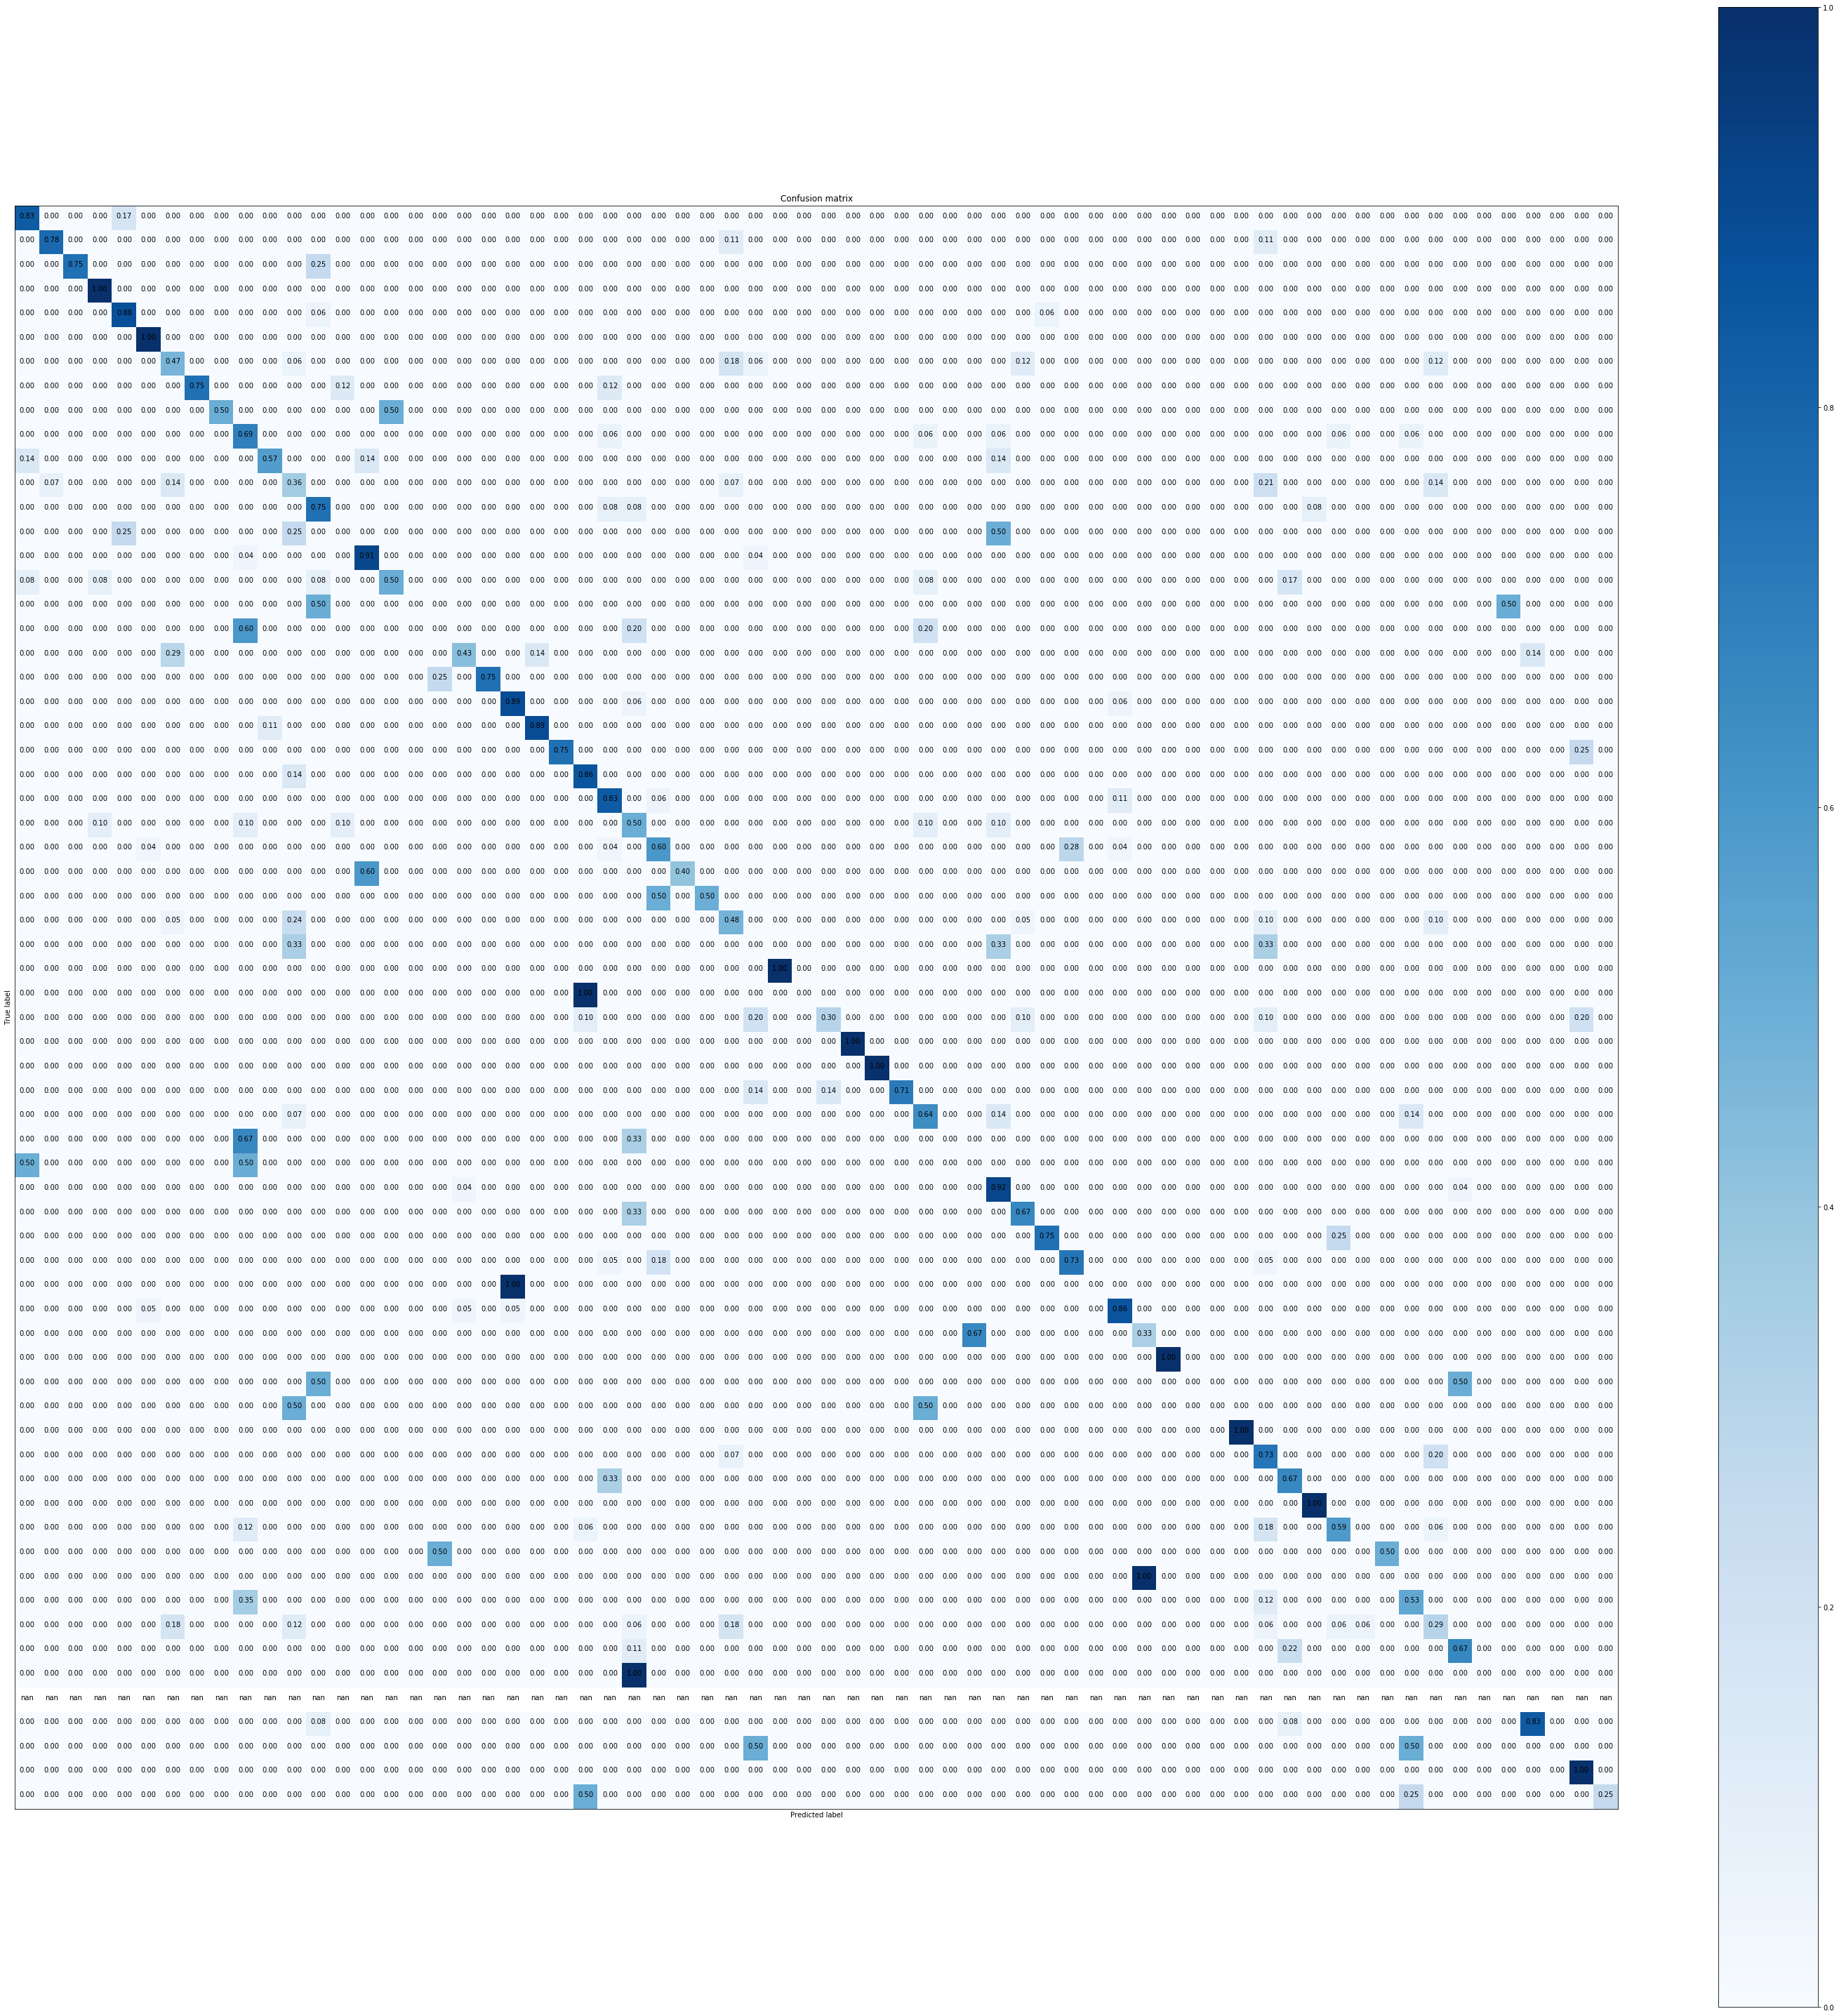

In [521]:
plot_confusion_matrix(metrics.confusion_matrix(labels, y_pred),[],normalize=True)